Importing libraries and a dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
try:
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['species'] = iris.target
    df['species'] = df['species'].map({i: species for i, species in enumerate(iris.target_names)})
    print("Dataset loaded successfully.")
except Exception as e:
    print(f"Error loading dataset: {e}")


Dataset loaded successfully.


View first 5 rows of the dataset

In [2]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Check Data Types and Missing Values

In [3]:
print("Data types:")
print(df.dtypes)

print("\nMissing values:")
print(df.isnull().sum())


Data types:
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object

Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


Task 2: Basic Data Analysis

Descriptive Statistics

In [4]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Grouping data and calculating mean

In [5]:
group_means = df.groupby('species').mean()
group_means


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Data visualisation

line chart

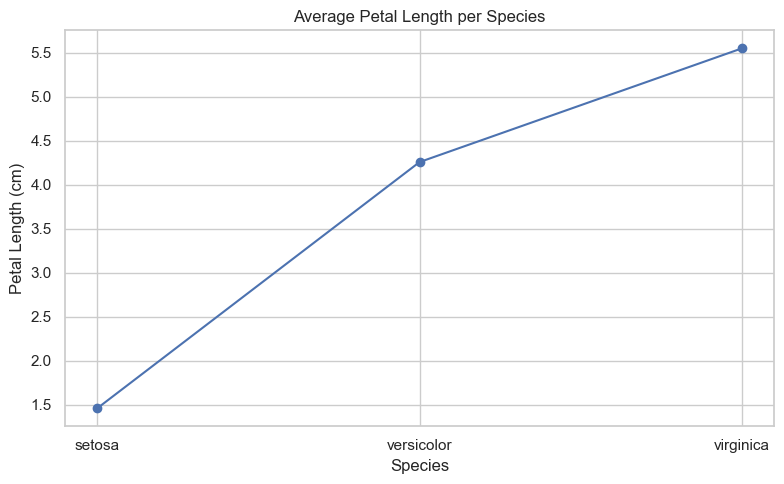

In [6]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
group_means['petal length (cm)'].plot(kind='line', marker='o', title='Average Petal Length per Species')
plt.ylabel('Petal Length (cm)')
plt.xlabel('Species')
plt.xticks(ticks=range(len(group_means)), labels=group_means.index)
plt.grid(True)
plt.tight_layout()
plt.show()


Bar chart

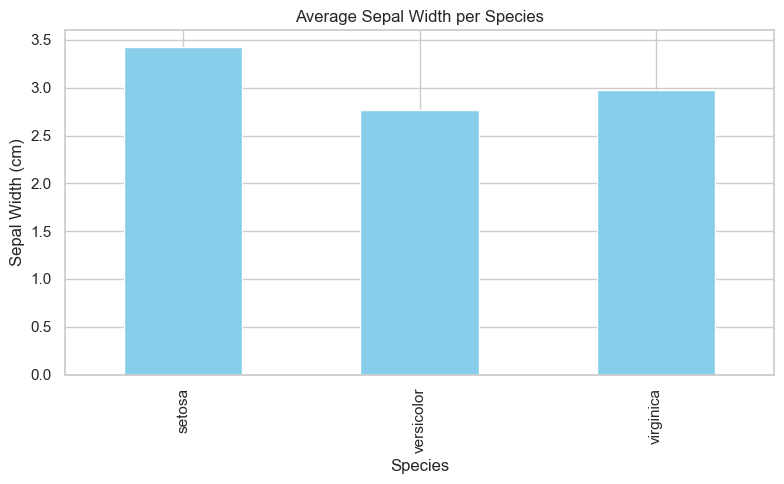

In [7]:
plt.figure(figsize=(8, 5))
group_means['sepal width (cm)'].plot(kind='bar', title='Average Sepal Width per Species', color='skyblue')
plt.ylabel('Sepal Width (cm)')
plt.xlabel('Species')
plt.tight_layout()
plt.show()


Histogram

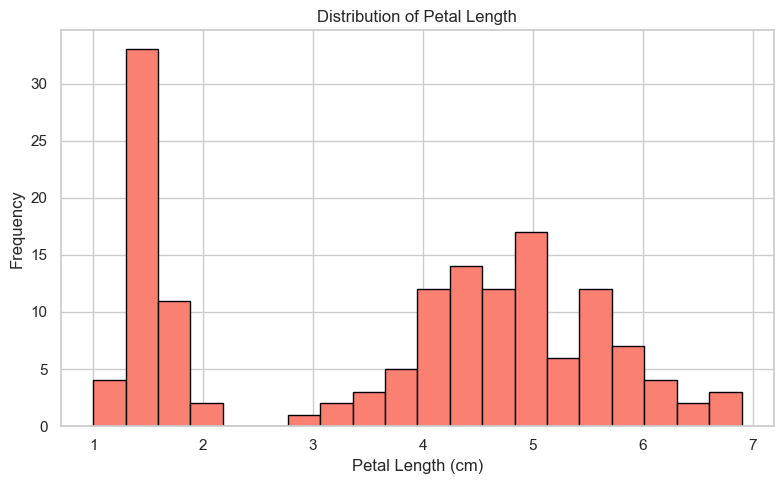

In [8]:
plt.figure(figsize=(8, 5))
plt.hist(df['petal length (cm)'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Petal Length')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Scatter plot

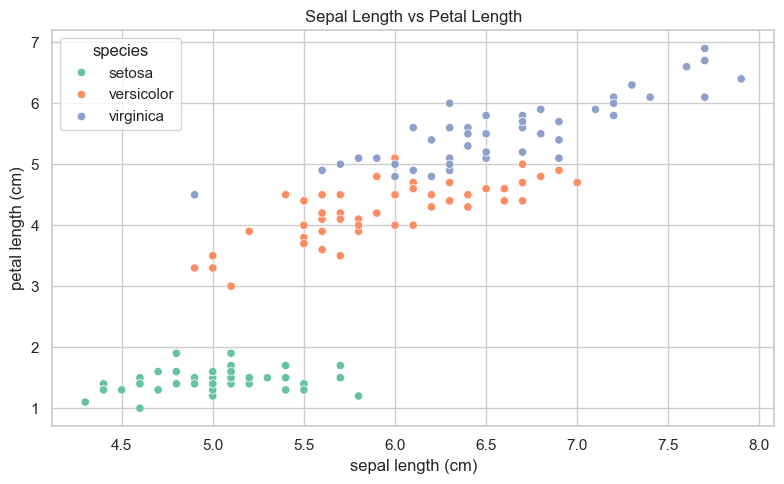

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='Set2')
plt.title('Sepal Length vs Petal Length')
plt.tight_layout()
plt.show()
